In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.spatial
import mvpa2.suite
import sklearn_lvq

from neurolab import net
from sklearn.datasets import make_blobs

%matplotlib inline

In [247]:
plt.style.use('ggplot')

In [117]:
np.random.seed(21)

###  Задание 1 
### Использовать слой Кохонена для выполнения кластеризации множества точек.

In [249]:
P, T = make_blobs(cluster_std=0.1, n_samples=80, n_features=2, centers=8, center_box=(0, 3), random_state=177)

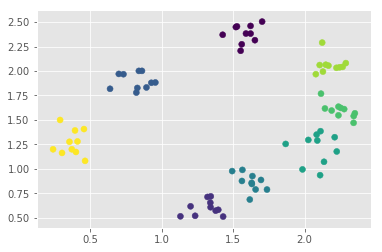

In [250]:
plt.scatter(P[:, 0], P[:, 1], c=T)
plt.grid(True)

In [252]:
nn = net.newc([[0, 0.7], [0, 1.5]], 8)
nn.train(P, epochs=500);

Epoch: 100; Error: 13.0467332756;
Epoch: 200; Error: 12.4469067364;
Epoch: 300; Error: 12.5404567456;
Epoch: 400; Error: 12.5675938465;
Epoch: 500; Error: 12.5753434439;
The maximum number of train epochs is reached


In [253]:
nn.layers[0].np['w']

array([[1.30002752, 0.59376171],
       [1.68466899, 2.35878047],
       [1.61440628, 0.85887199],
       [0.36546124, 1.27639165],
       [0.81015085, 1.89451013],
       [2.1758828 , 1.98354111],
       [2.23912073, 1.53907854],
       [2.0741455 , 1.17452958]])

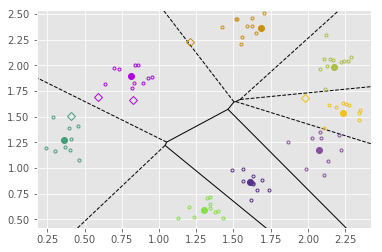

In [254]:
X_test = [[np.random.uniform(0.2, 2.3), np.random.uniform(0.5, 2.5)] for _ in range(5)]
scipy.spatial.voronoi_plot_2d(scipy.spatial.Voronoi(nn.layers[0].np['w']), show_vertices=False)
for i in range(8):
    check = [0] * 8
    check[i] = 1
    check = np.array([check], np.float32)
    plts = np.array([j for j in P if np.array_equal(nn.sim([j]), check)])
    plts2 = np.array([j for j in X_test if np.array_equal(nn.sim([j]), check)])
    clr = np.random.rand(3)
    plt.plot(plts[:, 0], plts[:, 1], '.', fillstyle='none', color=clr)
    plt.plot([x[0] for x in plts2], [x[1] for x in plts2], 'D', fillstyle='none', color=clr)
    plt.plot([nn.layers[0].np['w'][i, 0]], [nn.layers[0].np['w'][i, 1]], 'o', color=clr)

### Задание 2 
### Использовать карту Кохонена для выполнения кластеризации множества точек. 

In [255]:
P, T = make_blobs(cluster_std=0.1, n_samples=80, n_features=2, centers=8, center_box=(0, 3), random_state=32)

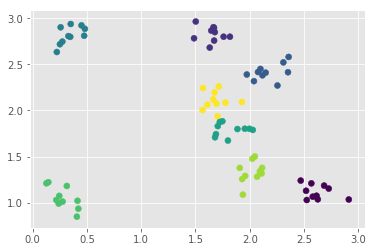

In [256]:
plt.scatter(P[:, 0], P[:, 1], c=T)
plt.grid(True)

In [257]:
nn = mvpa2.suite.SimpleSOMMapper((4, 2), 150)
nn.train(P)

In [258]:
nn.K.reshape(8, 2)

array([[2.12819291, 1.70004976],
       [2.04112992, 1.99295713],
       [1.65074978, 1.69231875],
       [1.49979391, 2.42420713],
       [0.8733861 , 1.88136275],
       [0.94834722, 2.20807604],
       [1.65534094, 1.40886383],
       [1.47627868, 2.22743526]])

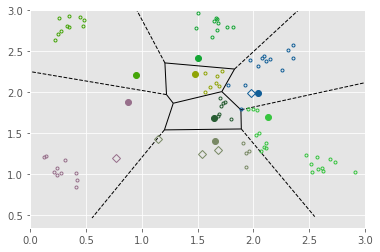

In [259]:
X = [[np.random.uniform(0.5, 2.3), np.random.uniform(0.75, 2.2)] for _ in range(5)]

scipy.spatial.voronoi_plot_2d(scipy.spatial.Voronoi(nn.K.reshape(8, 2)), show_vertices=False)
plt.xlim((0, 3))
plt.ylim((0.35, 3))

C = set((i[0], i[1]) for i in list(nn.generate(P))[0].tolist())
for chk in C:
    plts = [P[j] for j in range(len(P)) if np.array_equal(list(nn.generate([P[j]]))[0][0], chk)]
    plts2 = [X[j] for j in range(len(X)) if np.array_equal(list(nn.generate([X[j]]))[0][0], chk)]
    clr=0.8*np.random.rand(3,)
    plt.plot([x[0] for x in plts], [x[1] for x in plts],'.', fillstyle='none', color=clr)
    plt.plot([x[0] for x in plts2], [x[1] for x in plts2],'D', fillstyle='none', color=clr)
    center = [j for j in range(8) if np.array_equal(list(nn.generate([nn.K.reshape(8, 2)[j]]))[0][0], chk)]
    plt.plot([nn.K.reshape(8, 2)[center[0],0]], [nn.K.reshape(8, 2)[center[0],1]], 'o', color=clr)

### Задание 3 
### Использовать карту Кохонена для нахождения одного из решений задачи коммивояжера. 

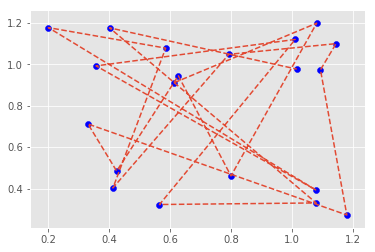

In [274]:
z = np.array([[np.random.uniform(0.2, 1.2), np.random.uniform(0.2, 1.2)] for _ in range(20)])
plt.plot(z[:, 0], z[:, 1], '--')
plt.scatter(z[:, 0], z[:, 1], c='blue');

In [275]:
nn = mvpa2.suite.SimpleSOMMapper((20,1), 3000, 0.4)
nn.train(np.array(z))

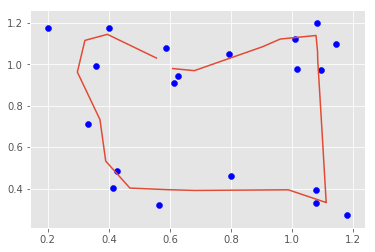

In [276]:
plt.scatter(z[:, 0], z[:, 1], c='blue');
plt.plot(nn.K.reshape(20, 2)[:,0], nn.K.reshape(20, 2)[:,1]);

### Задание 4 
### Использовать сеть векторного квантования, обучаемую с учителем, (LVQ-сеть) для классификации точек в случае, когда классы не являются линейно разделимыми.

In [266]:
points = np.array([[0.5, 0.7, 0.4, 0.6, -0.7, -1.3, 0.5, 1.3, -0.2, 0.7, -1, -0.2],
                   [0.7, -0.4, -1, -1.5, -1.4, 0.9, -0.6, -1.4, -0.4, 0.8, -0.1, 0.4]])
target = np.array([1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1])
points = points.T

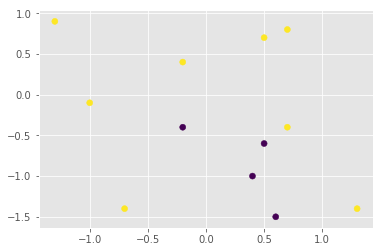

In [280]:
plt.scatter(points[:, 0], points[:, 1], c=target);
plt.grid(True)

In [241]:
lvq = sklearn_lvq.LmrslvqModel([6, 6])
lvq.fit(points, target);

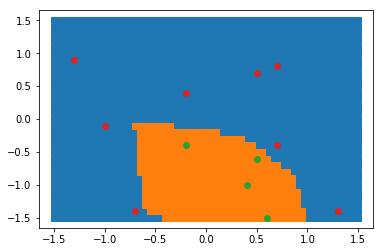

In [242]:
coef1_x = []
coef1_y = []
coef2_x = []
coef2_y = []

for x in np.arange(-1.5, 1.51, 0.05):
    for y in np.arange(-1.5, 1.51, 0.1):
        if lvq.predict([[x, y]]) == 1:
            coef1_x.append(x)
            coef1_y.append(y)
        else:
            coef2_x.append(x)
            coef2_y.append(y)
plt.plot(coef1_x, coef1_y, 's')
plt.plot(coef2_x, coef2_y, 's')
plt.plot([points[i][0] for i in range(12) if target[i] == 0], 
         [points[i][1] for i in range(12) if target[i] == 0], 'o')
plt.plot([points[i][0] for i in range(12) if target[i] == 1], 
         [points[i][1] for i in range(12) if target[i] == 1], 'o');